In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
train=pd.read_csv('/content/train.csv')
X_test=pd.read_csv('/content/test.csv')

In [ ]:
y_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

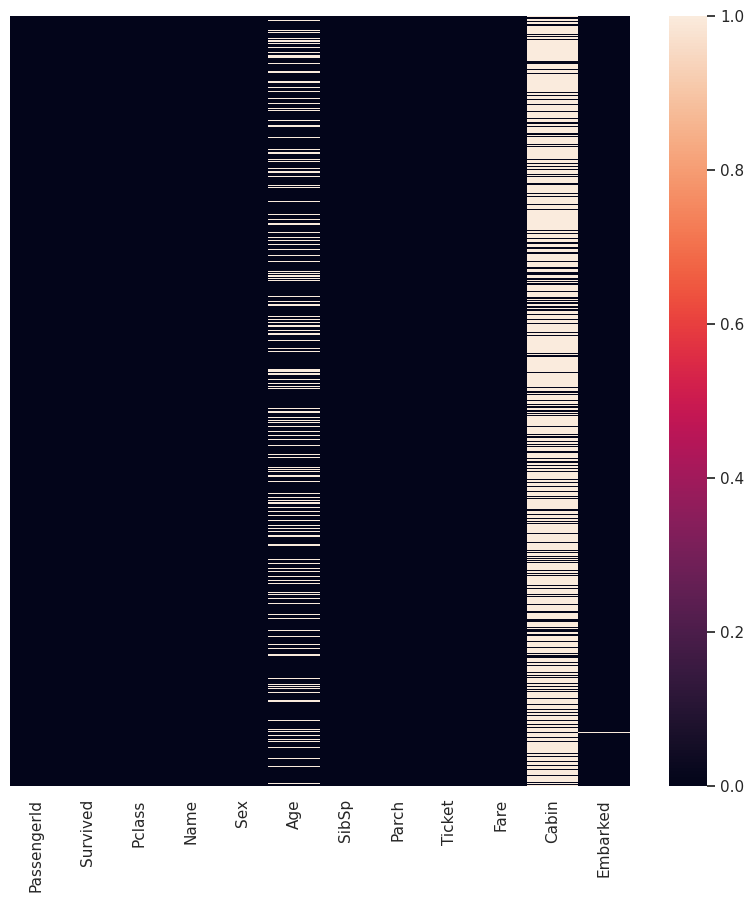

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)

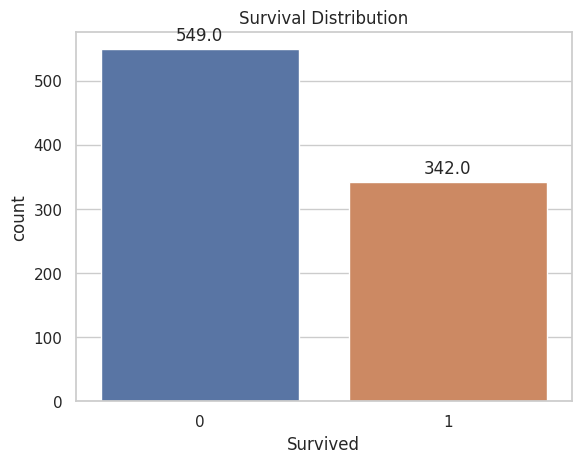

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Survived', data=train)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Survival Distribution')
plt.show()

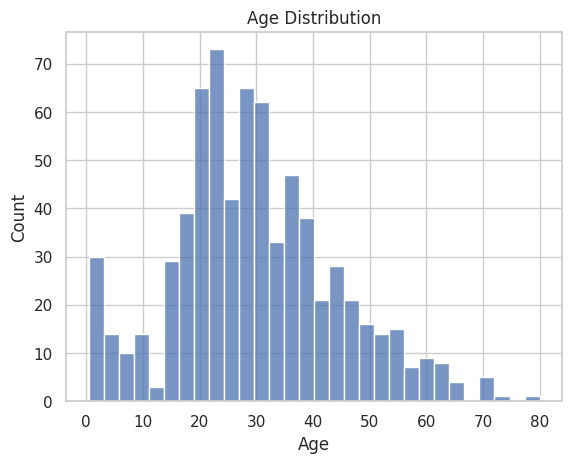

In [ ]:
sns.histplot(train['Age'].dropna(), bins=30, kde=False)
plt.title('Age Distribution')
plt.show()


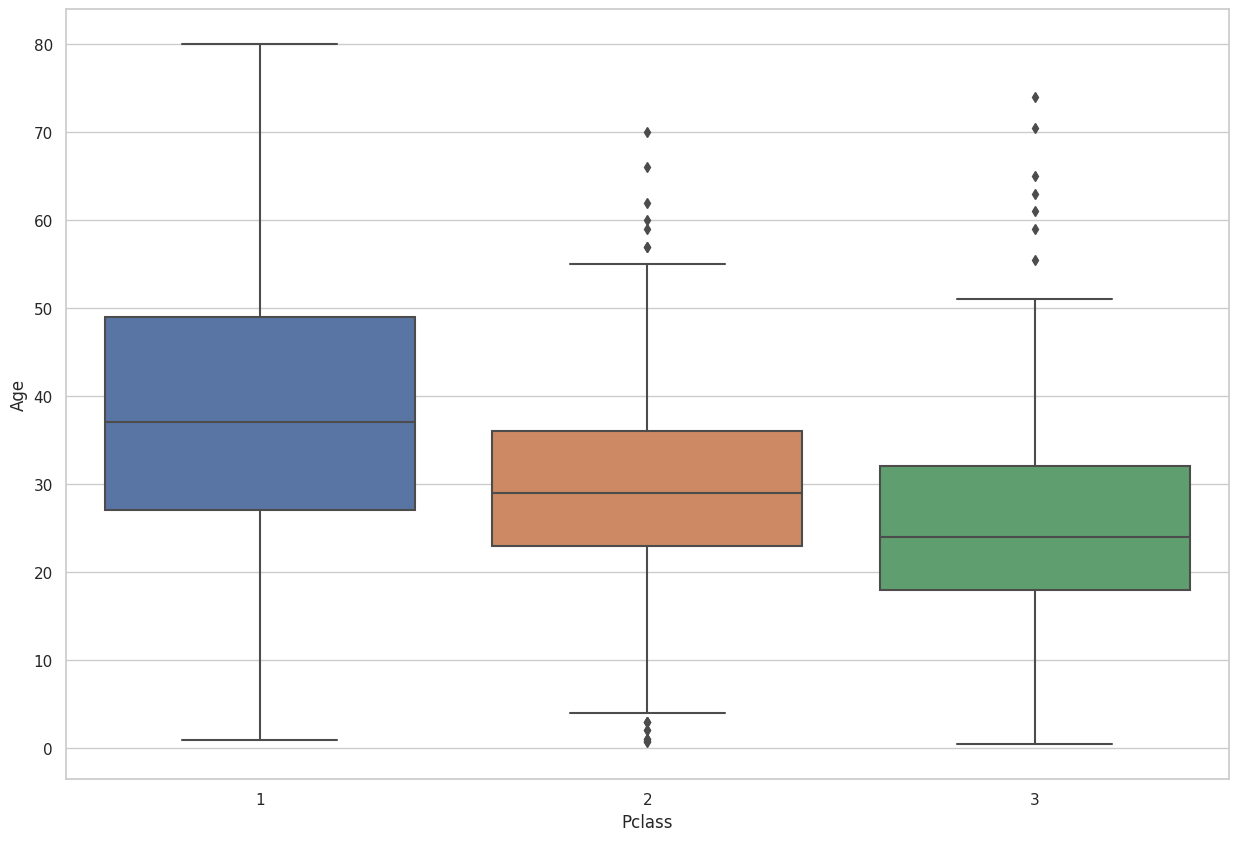

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(x='Pclass', y='Age', data=train)
plt.show()


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
def get_Age(cols) :
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age) :
        if Pclass==1 :
            return 38
        elif Pclass==2:
            return 29
        else :
            return 24
    else :
        return Age

<ipython-input-67-14afd2ef8614>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


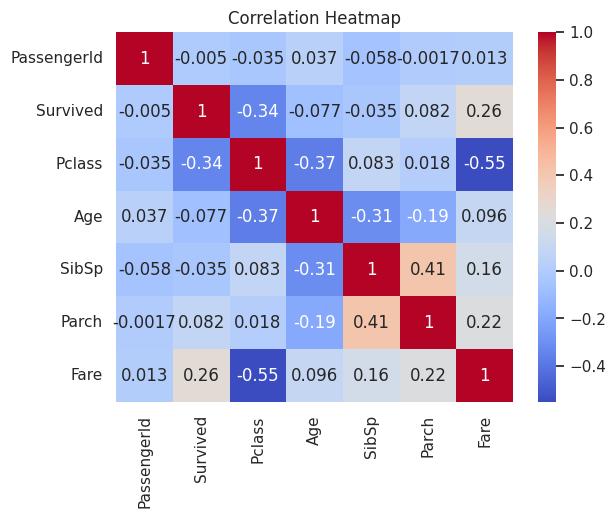

In [ ]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-68-1cb6bcdeb7e2>:5: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = train.cov()
<ipython-input-68-1cb6bcdeb7e2>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


Covariance Matrix:
              PassengerId  Survived     Pclass         Age      SibSp  \
PassengerId  66231.000000 -0.626966  -7.561798  138.696504 -16.325843   
Survived        -0.626966  0.236772  -0.137703   -0.551296  -0.018954   
Pclass          -7.561798 -0.137703   0.699015   -4.496004   0.076599   
Age            138.696504 -0.551296  -4.496004  211.019125  -4.163334   
SibSp          -16.325843 -0.018954   0.076599   -4.163334   1.216043   
Parch           -0.342697  0.032017   0.012429   -2.344191   0.368739   
Fare           161.883369  6.221787 -22.830196   73.849030   8.748734   

                Parch         Fare  
PassengerId -0.342697   161.883369  
Survived     0.032017     6.221787  
Pclass       0.012429   -22.830196  
Age         -2.344191    73.849030  
SibSp        0.368739     8.748734  
Parch        0.649728     8.661052  
Fare         8.661052  2469.436846  

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
P

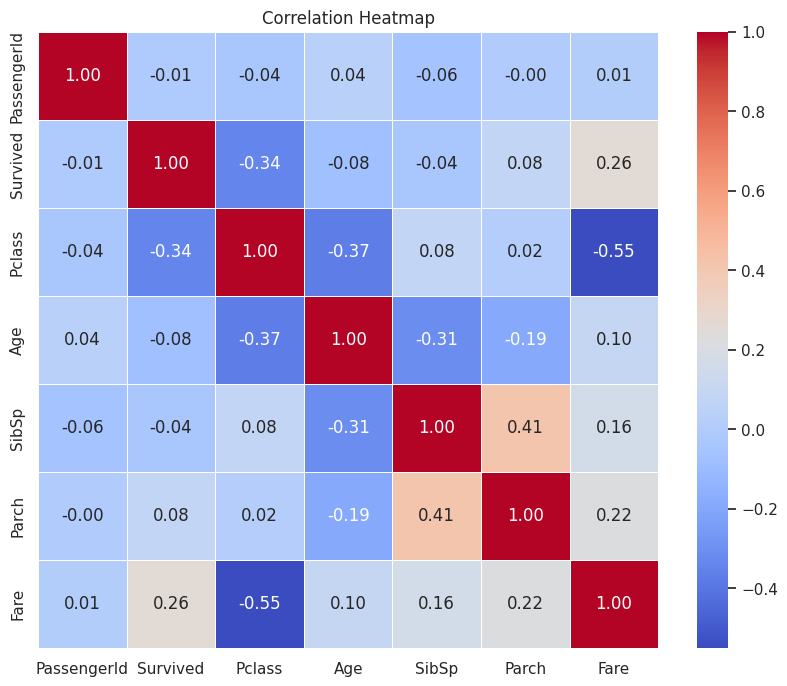


Chi-square Test for Sex and Survived:
Chi2 value: 260.71702016732104
P-value: 1.1973570627755645e-58

T-test for Fare between Survived and Not Survived:
T-statistic: 7.939191660871055
P-value: 6.120189341924198e-15

ANOVA for Fare across Pclass:
F-statistic: 242.34415651744814
P-value: 1.0313763209141171e-84


In [ ]:
from scipy.stats import chi2_contingency, ttest_ind, f_oneway


# Covariance matrix
covariance_matrix = train.cov()
print("Covariance Matrix:")
print(covariance_matrix)

# Correlation matrix
correlation_matrix = train.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heat map for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Chi-square test for categorical variables (e.g., Sex and Survived)
chi2, p_value, _, _ = chi2_contingency(pd.crosstab(train['Sex'], train['Survived']))
print("\nChi-square Test for Sex and Survived:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p_value}")

# Z-test or t-test for comparing means (e.g., Fare between Survived and Not Survived)
survived_fare = train[train['Survived'] == 1]['Fare']
not_survived_fare = train[train['Survived'] == 0]['Fare']

# Assuming a t-test (use ztest for large samples)
t_stat, p_value_t = ttest_ind(survived_fare.dropna(), not_survived_fare.dropna())
print("\nT-test for Fare between Survived and Not Survived:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value_t}")

# ANOVA for comparing means across multiple groups (e.g., Pclass and Fare)
anova_result = f_oneway(train['Fare'][train['Pclass'] == 1].dropna(),
                        train['Fare'][train['Pclass'] == 2].dropna(),
                        train['Fare'][train['Pclass'] == 3].dropna())
print("\nANOVA for Fare across Pclass:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


In [ ]:
train['Age']=train[['Age','Pclass']].apply(get_Age,axis=1)

In [ ]:
from scipy.linalg import svd
selected_columns = ['PassengerId', 'Age', 'Survived']
data_matrix = train[selected_columns].values
U, S, Vt = svd(data_matrix)
print("Matrix U:")
print(U)
print("\nMatrix S (Diagonal Matrix):")
print(np.diag(S))
print("\nMatrix Vt:")
print(Vt)

Matrix U:
[[-1.35588437e-04  3.79662510e-02  9.45555426e-03 ... -5.68315663e-02
  -5.63239559e-02 -5.74906419e-02]
 [-2.51942943e-04  6.55659447e-02 -4.95875160e-02 ...  3.67991211e-02
   3.31261965e-02  2.31563795e-02]
 [-2.78302249e-04  4.47247716e-02 -5.47122860e-02 ...  2.84476717e-02
  -3.65973277e-02  3.19806195e-02]
 ...
 [-5.77827720e-02 -3.45976129e-02  2.91626163e-02 ...  9.94757463e-01
  -3.42756874e-03 -4.91598601e-03]
 [-5.78541498e-02 -3.12127409e-02 -3.58841169e-02 ... -3.47061292e-03
   9.94332503e-01 -2.93418337e-03]
 [-5.79382945e-02 -2.09317952e-02  3.26357344e-02 ... -4.88299828e-03
  -2.86196895e-03  9.95252539e-01]]

Matrix S (Diagonal Matrix):
[[1.53869282e+04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.77439233e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.51682866e+01]]

Matrix Vt:
[[-9.98777266e-01 -4.94323768e-02 -6.43135040e-04]
 [-4.94355119e-02  9.98756291e-01  6.48079345e-03]
 [ 3.21974143e-04  6.50466287e-03 -9.99978793e-01]]


In [ ]:
train.drop(['PassengerId','Ticket','Cabin','Name'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
X_test.drop(['PassengerId','Ticket','Cabin','Name'],axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train=train.dropna(axis=0,how='any')

<Axes: >

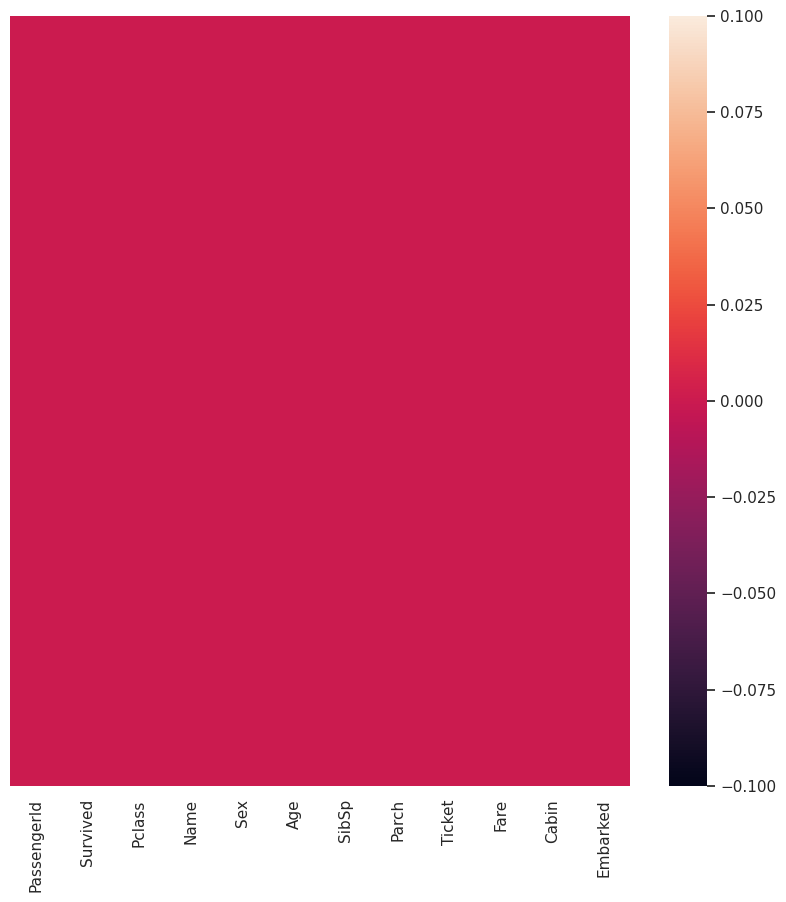

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)


<Axes: xlabel='Pclass', ylabel='Age'>

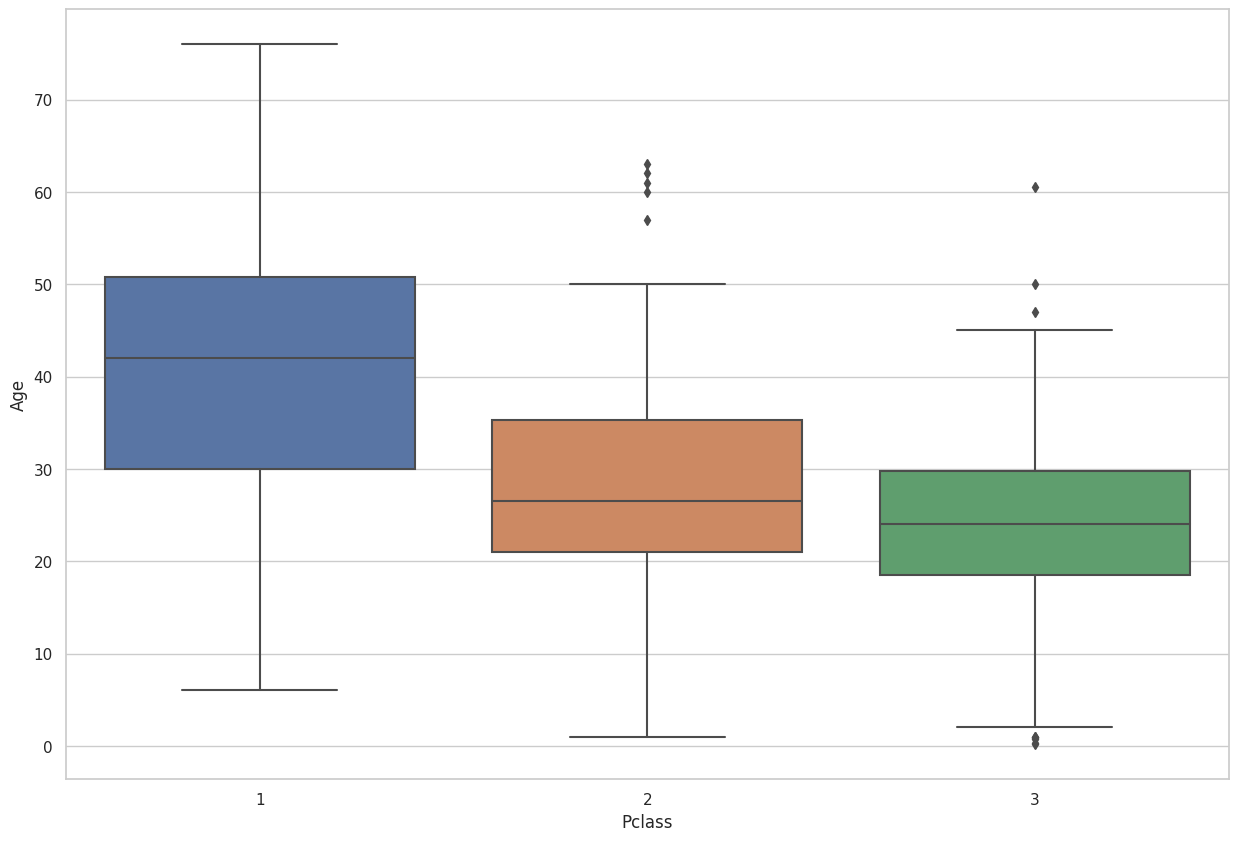

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Age',data=X_test)

In [ ]:
def get_Age2(cols) :
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age) :
        if Pclass==1 :
            return 42
        elif Pclass==2:
            return 25
        else :
            return 22
    else :
        return Age


In [ ]:
X_test['Age']=X_test[['Age','Pclass']].apply(get_Age2,axis=1)

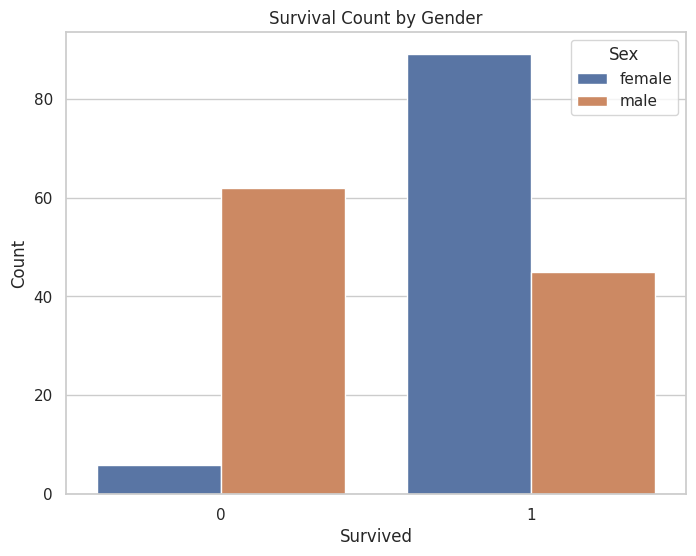

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

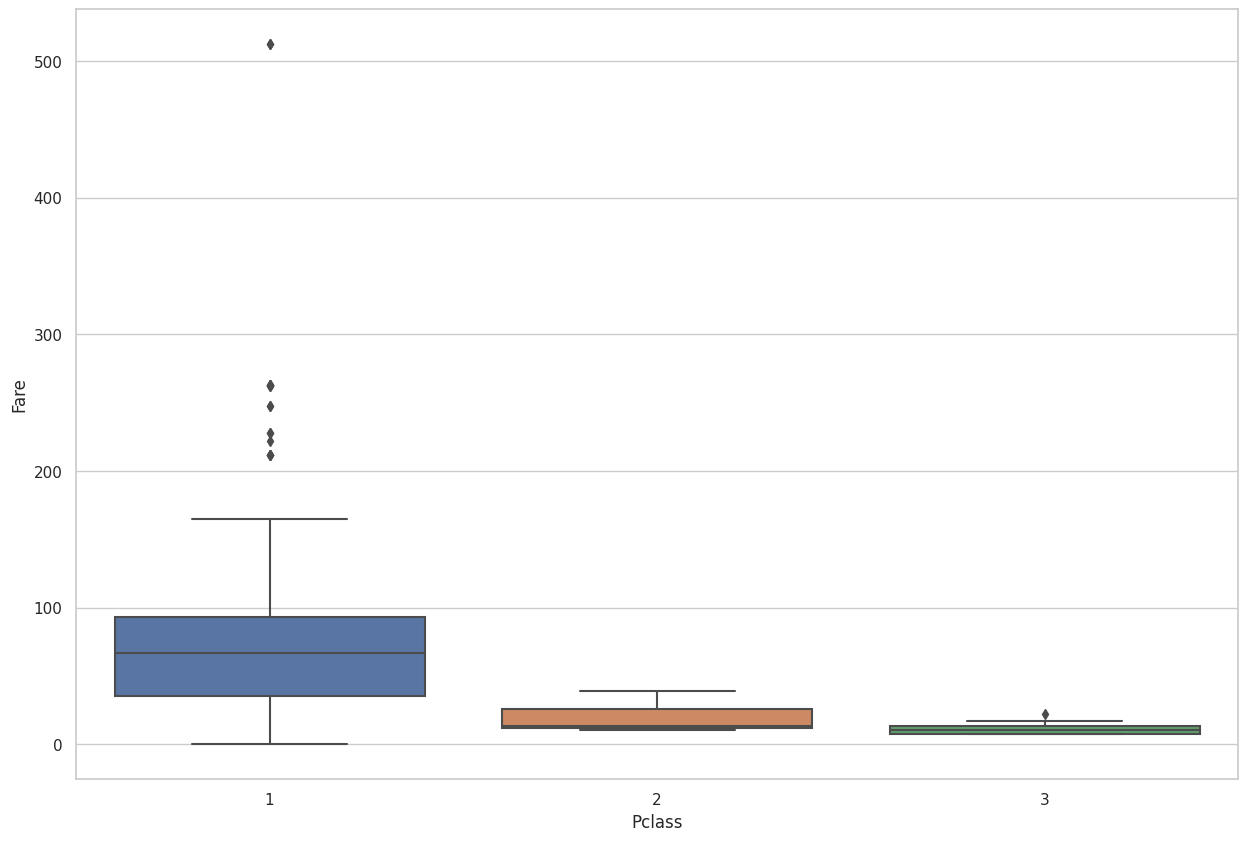

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Fare',data=train)

<Axes: xlabel='Survived', ylabel='count'>

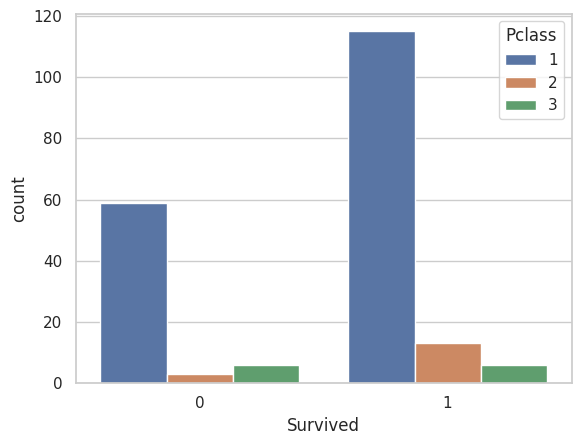

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<ipython-input-82-d3bb0698b36c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'],bins=40)


<Axes: xlabel='Fare', ylabel='Density'>

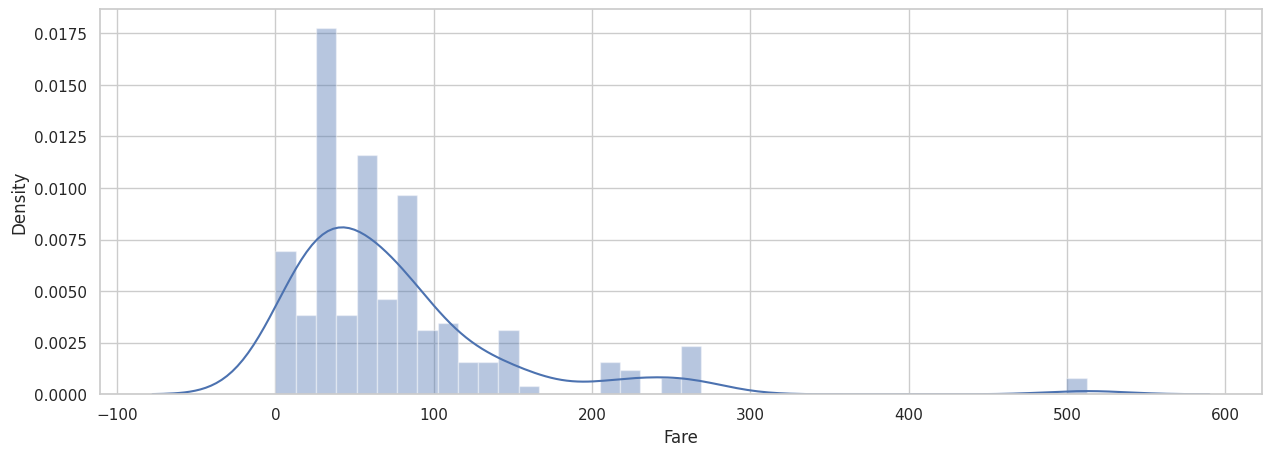

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(train['Fare'],bins=40)

<ipython-input-83-884b3328adf0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_fare,bins=40)


<Axes: xlabel='Fare', ylabel='Density'>

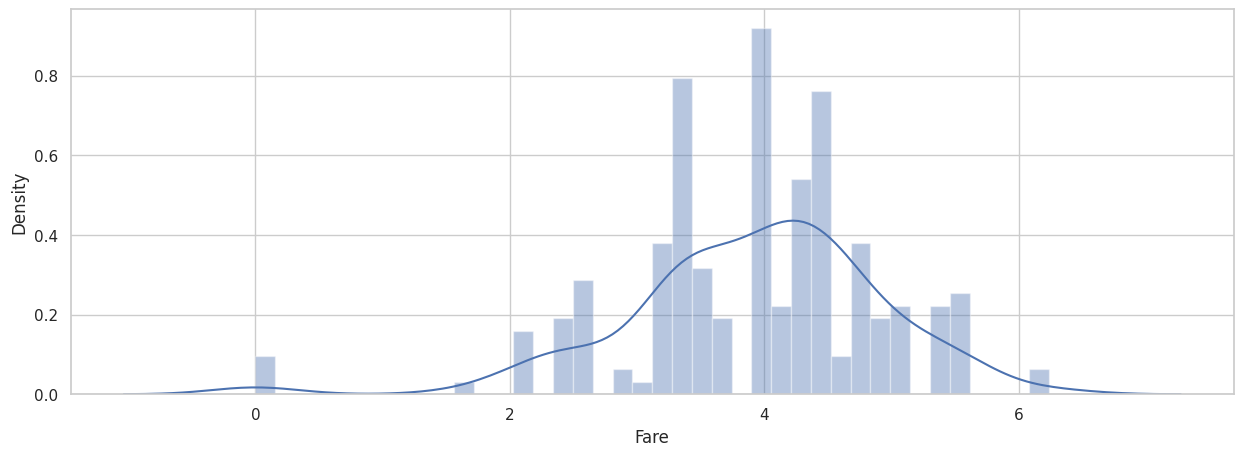

In [ ]:
train_fare = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(15,5))
sns.distplot(train_fare,bins=40)


In [ ]:
fare=train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
sex=pd.get_dummies(train['Sex'],drop_first=True)
emb=pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
y_train=train['Survived']
train.drop(['Embarked','Sex','Survived','Fare'],axis=1)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Cabin
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,C85
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,C123
6,7,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,E46
10,11,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,G6
11,12,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,C103
...,...,...,...,...,...,...,...,...
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,D35
872,873,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,B51 B53 B55
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,C50
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,B42


In [ ]:
X_train=pd.concat([train,sex,emb,fare],axis=1)
y_train=train['Survived']

In [ ]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,4.266662
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,3.972177
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,3.948596
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,2.815409
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,3.279030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,0,1,3.961845
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1,0,1,1.609438
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0,0,0,4.420746
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,3.401197


In [ ]:
test_fare=X_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
test_sex=pd.get_dummies(X_test['Sex'],drop_first=True)
test_emb=pd.get_dummies(X_test['Embarked'],drop_first=True)
X_test.drop(['Embarked','Sex','Fare'],axis=1)
X_test=pd.concat([X_test,test_sex,test_emb,test_fare],axis=1)

In [ ]:
Y_test=pd.concat([X_test,test_sex,test_emb,test_fare,y_test],axis=1)
Y_test=Y_test.dropna(axis=0,how='any')

In [ ]:
y_test=Y_test['Survived']

Explained Variance Ratio for PCA:
[0.26400866 0.20654038]


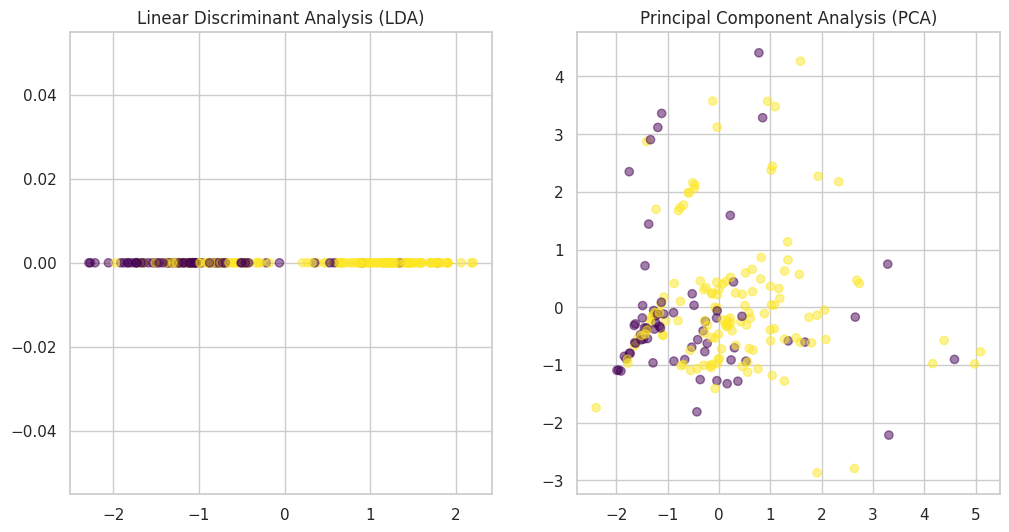

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Extract features (X) and target variable (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

# Encode categorical variables
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

# Drop non-numeric columns and handle missing values
numeric_df = X.select_dtypes(include=['number']).dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display explained variance ratio for PCA
print("Explained Variance Ratio for PCA:")
print(pca.explained_variance_ratio_)

# Visualization of the first two principal components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='viridis', alpha=0.5)
plt.title('Linear Discriminant Analysis (LDA)')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('Principal Component Analysis (PCA)')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Extract features (X) and target variable (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

# Encode categorical variables
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

# Drop non-numeric columns and handle missing values
numeric_df = X.select_dtypes(include=['number']).dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

print(accuracy_score(y_test,nb_pred))
print(classification_report(y_test,nb_pred))
print(confusion_matrix(y_test,nb_pred))


print('#'*100)

# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

print(accuracy_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))

print('#'*100)

# Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_pred)
print(f"LDA Accuracy: {lda_accuracy}")

print(accuracy_score(y_test,lda_pred))
print(classification_report(y_test,lda_pred))
print(confusion_matrix(y_test,lda_pred))

print('#'*100)

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#print(accuracy_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))

# K-Nearest Neighbors (KNN) with different distance metrics
knn_metrics = ['euclidean', 'manhattan', 'chebyshev']
for metric in knn_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    print(f"KNN ({metric} distance) Accuracy: {knn_accuracy}")
    print(accuracy_score(y_test,knn_pred))
    print(classification_report(y_test,knn_pred))
    print(confusion_matrix(y_test,knn_pred))


Naive Bayes Accuracy: 0.8048780487804879
0.8048780487804879
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.90      0.85      0.88        33

    accuracy                           0.80        41
   macro avg       0.70      0.74      0.72        41
weighted avg       0.82      0.80      0.81        41

[[ 5  3]
 [ 5 28]]
####################################################################################################
Decision Tree Accuracy: 0.7317073170731707
0.7317073170731707
              precision    recall  f1-score   support

           0       0.41      0.88      0.56         8
           1       0.96      0.70      0.81        33

    accuracy                           0.73        41
   macro avg       0.69      0.79      0.68        41
weighted avg       0.85      0.73      0.76        41

[[ 7  1]
 [10 23]]
#####################################################################################

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Random Forest with Grid Search for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the search
best_rf_model = grid_search.best_estimator_

# Fit the best model on the training data
best_rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = best_rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Best Random Forest Accuracy: {rf_accuracy}")
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

print(accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

Best Random Forest Accuracy: 0.8048780487804879
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
0.8048780487804879
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.86      0.91      0.88        33

    accuracy                           0.80        41
   macro avg       0.68      0.64      0.66        41
weighted avg       0.79      0.80      0.79        41

[[ 3  5]
 [ 3 30]]


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
lgr=LogisticRegression(max_iter=500)
lgr_train=lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8536585365853658
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.91      0.91      0.91        33

    accuracy                           0.85        41
   macro avg       0.77      0.77      0.77        41
weighted avg       0.85      0.85      0.85        41

[[ 5  3]
 [ 3 30]]


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have defined your logistic regression model and data
lgr = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate the Logistic Regression
cv_scores = cross_val_score(lgr, X_train, y_train, cv=cv, scoring='accuracy')

# Display cross-validation scores
print("\nCross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))




Cross-Validation Scores:
[0.6969697 0.875     0.6875    0.6875    0.625    ]
Mean CV Accuracy: 0.7143939393939395


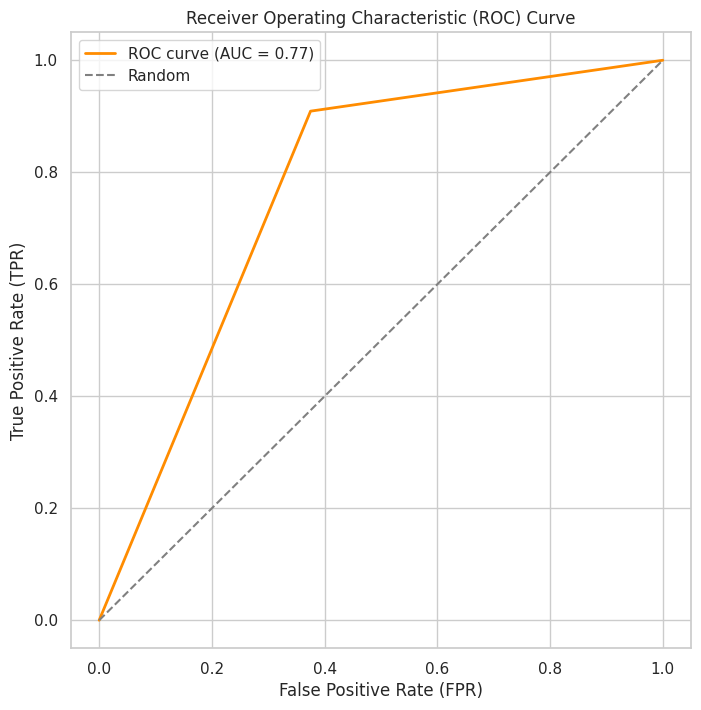

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train has multiple features, update input_shape accordingly
num_features = X_train_scaled.shape[1]

# Build a neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Check the summary of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# Predict probabilities on the test set
y_scores_nn = model.predict(X_test_scaled)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate average accuracy during training
avg_accuracy = np.mean(history.history['accuracy'])
print(f'Average Training Accuracy: {avg_accuracy * 100:.2f}%')

# Predict binary labels
y_pred_binary = (y_scores_nn > 0.5).astype(int)

# Calculate additional metrics
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print additional metrics
print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                512       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2625 (10.25 KB)
Trainable params: 2625 (10.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0s 15ms/step - loss: 0.5064 - accuracy: 0.6667
Test Accuracy: 66.67%
Average Training Accuracy: 77.86%
Confusion Matrix:
[[ 6  4]
 [ 7 16]]
Precision: 0.80
Recall: 0.70
F1 Score: 0.74


In [ ]:
pip install pgmpy

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
import pandas as pd

# Assuming df is your DataFrame with the specified columns
selected_columns = ['Pclass', 'Age', 'SibSp', 'Survived', 'Sex', 'Fare']

# Create a new DataFrame with only the selected columns
data = train[selected_columns]

# Define the structure of the Bayesian Network
model = BayesianModel([('Pclass', 'Fare'), ('Pclass', 'Age'), ('SibSp', 'Age'), ('Pclass', 'Survived'), ('Age', 'Survived'), ('Sex', 'Survived')])

# Estimate CPDs (Conditional Probability Distributions)
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Print the CPDs
for cpd in model.get_cpds():
    print(cpd)


+-----------+-----------+
| Pclass(1) | 0.861386  |
+-----------+-----------+
| Pclass(2) | 0.0792079 |
+-----------+-----------+
| Pclass(3) | 0.0594059 |
+-----------+-----------+
+----------------+----------------------+-----------+---------------------+
| Pclass         | Pclass(1)            | Pclass(2) | Pclass(3)           |
+----------------+----------------------+-----------+---------------------+
| Fare(0.0)      | 0.017241379310344827 | 0.0       | 0.0                 |
+----------------+----------------------+-----------+---------------------+
| Fare(5.0)      | 0.005747126436781609 | 0.0       | 0.0                 |
+----------------+----------------------+-----------+---------------------+
| Fare(7.65)     | 0.0                  | 0.0       | 0.25                |
+----------------+----------------------+-----------+---------------------+
| Fare(7.75)     | 0.0                  | 0.0       | 0.08333333333333333 |
+----------------+----------------------+-----------+-----

In [ ]:
from pgmpy.inference import VariableElimination

# Create an inference object
inference = VariableElimination(model)

# Perform inference for a specific query
query = inference.query(variables=['Survived'], evidence={'Pclass': 1, 'Age': 30, 'Sex': 'male'})

# Print the resulting probabilities# Assuming 'model' is your trained Bayesian network model
from pgmpy.inference import VariableElimination

# Create an inference object
inference = VariableElimination(model)

# List of queries with evidence
queries = [
    {'Pclass': 1, 'Age': 30, 'Sex': 'male'},

]

# Initialize variables for accuracy calculation
correct_predictions = 0
total_queries = len(queries)

# Perform inference and evaluate accuracy for each query
for evidence in queries:
    # Perform inference for a specific query
    query = inference.query(variables=['Survived'], evidence=evidence)

    # Extract the predicted probability for Survived=1
    predicted_prob_survived = query.values[1]

    # Retrieve the actual survival status from your DataFrame
    actual_survival_status = train[(train['Pclass'] == evidence['Pclass']) &
                                (train['Age'] == evidence['Age']) &
                                (train['Sex'] == evidence['Sex'])]['Survived'].values[0]

    # Compare the predicted probability with the actual data
    predicted_survival_status = 1 if predicted_prob_survived > 0.5 else 0  # Assuming a threshold of 0.5
    if predicted_survival_status == actual_survival_status:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_queries
print(f"Accuracy: {accuracy}")

print(query)



Accuracy: 1.0
+-------------+-----------------+
| Survived    |   phi(Survived) |
+=============+=================+
| Survived(0) |          1.0000 |
+-------------+-----------------+
| Survived(1) |          0.0000 |
+-------------+-----------------+


In [ ]:

# Create an inference object
inference = VariableElimination(model)

# Evidence for the query
evidence = {'Pclass': 1, 'Age': 30, 'Sex': 'male'}

# Perform inference for a specific query
query = inference.query(variables=['Survived'], evidence=evidence)

# Extract the predicted probability for Survived=1
predicted_prob_survived = query.values[1]

# Retrieve the actual survival status from your DataFrame
actual_survival_status = train[(train['Pclass'] == evidence['Pclass']) &
                             (train['Age'] == evidence['Age']) &
                             (train['Sex'] == evidence['Sex'])]['Survived'].values[0]

# Compare the predicted probability with the actual data
print(f"Actual Survived: {actual_survival_status}, Predicted Probability for Survived=1: {predicted_prob_survived}")

Actual Survived: 0, Predicted Probability for Survived=1: 0.0


In [ ]:
#Citation
#Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic
#Anshika Gupta, Deepak Arora, Shivam Tiwari, "Exploratory Data Analysis of Titanic Survival Prediction using Machine Learning Techniques", 2023 2nd International Conference on Applied Artificial Intelligence and Computing (ICAAIC), pp.418-422, 2023.